# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [2]:
#loading the dataset
dataset = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Supervised Learning\Foundations\Project 3\used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
dataset.head() #checking dataset contents

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
dataset.shape #getting the number of rows and columns

(3454, 15)

In [5]:
dataset.info() #looking at the column data types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
#statistical summary of numerical data
pd.set_option('display.float_format', lambda x: '%.2f' %x)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.00,13.71,3.81,5.08,12.70,12.83,15.34,30.71
main_camera_mp,3275.00,9.46,4.82,0.08,5.00,8.00,13.00,48.00
selfie_camera_mp,3452.00,6.55,6.97,0.00,2.00,5.00,8.00,32.00
int_memory,3450.00,54.57,84.97,0.01,16.00,32.00,64.00,1024.00
ram,3450.00,4.04,1.37,0.02,4.00,4.00,4.00,12.00
battery,3448.00,3133.40,1299.68,500.00,2100.00,3000.00,4000.00,9720.00
weight,3447.00,182.75,88.41,69.00,142.00,160.00,185.00,855.00
release_year,3454.00,2015.97,2.30,2013.00,2014.00,2015.50,2018.00,2020.00
days_used,3454.00,674.87,248.58,91.00,533.50,690.50,868.75,1094.00
normalized_used_price,3454.00,4.36,0.59,1.54,4.03,4.41,4.76,6.62


In [7]:
#summary of categorical data
cat_cols = ['brand_name', 'os', '4g', '5g']
for column in cat_cols:
  print(dataset[column].value_counts())
  print("_"*50)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
__________________________________________________
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
__________________________________________________
yes    2335
no     1119
Name: 4g, dtype: int64
__________________________________________________
no     3302
yes     152
Name: 5g, dtype: int64
_______________________

In [8]:
dataset.duplicated().sum() #checking for duplicate values

0

In [9]:
dataset.isnull().sum() #checking for null values

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [10]:
df = dataset.copy() #copying original dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [11]:
#function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color = "thistle") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  color = "thistle")
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [12]:
#function to create a labelled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")

    plt.show()

In [13]:
df.columns #looking at all the columns in the dataset

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

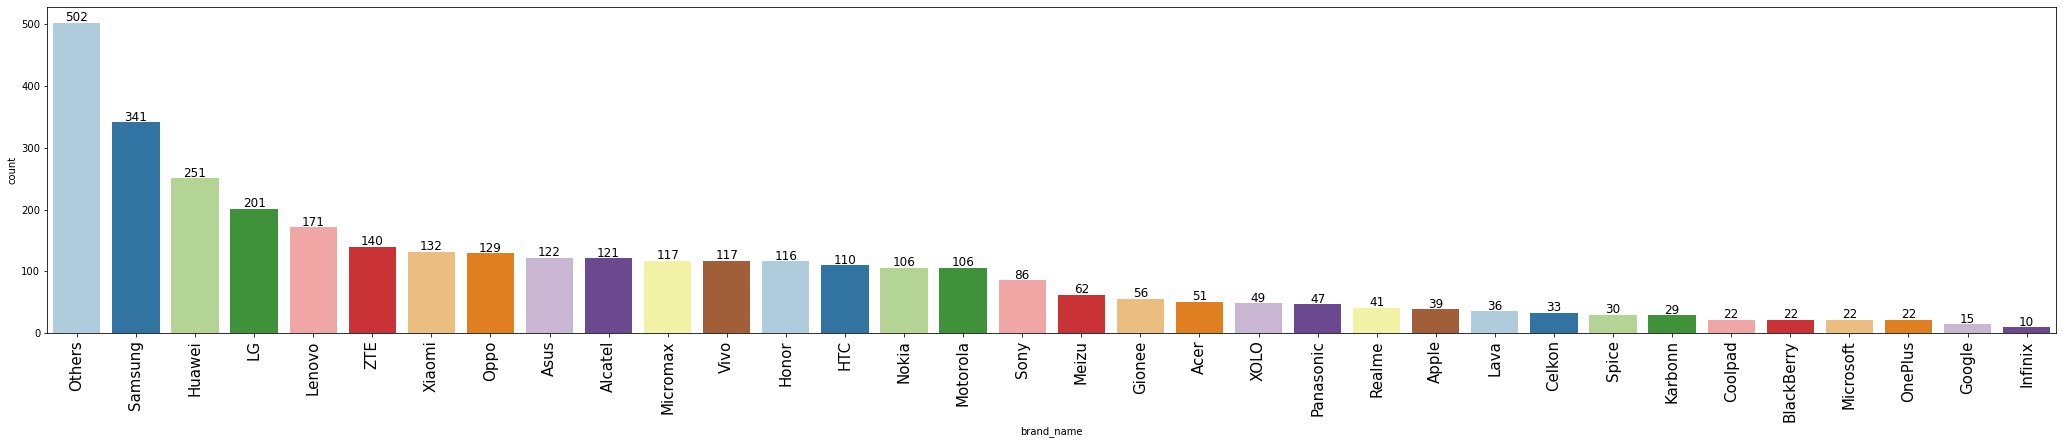

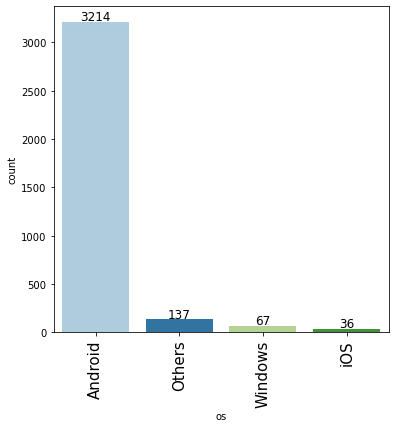

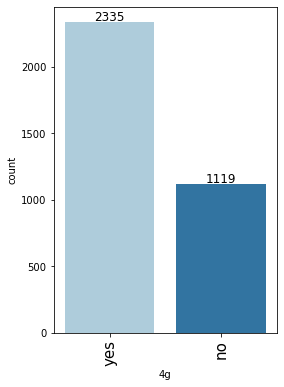

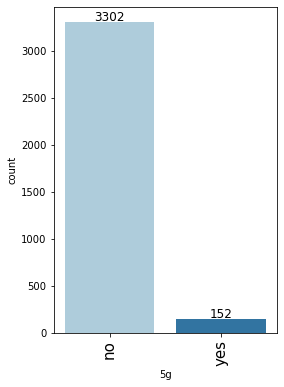

In [14]:
#plotting categorial data
cols_obj = ['brand_name', 'os', '4g', '5g']
for col in cols_obj:
  labeled_barplot(df, col)

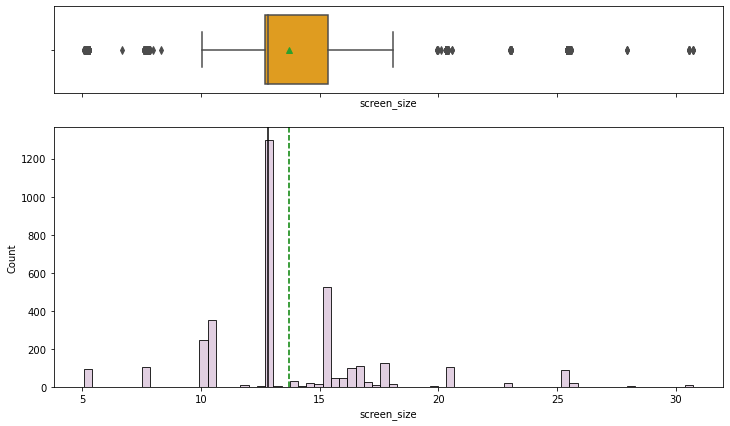

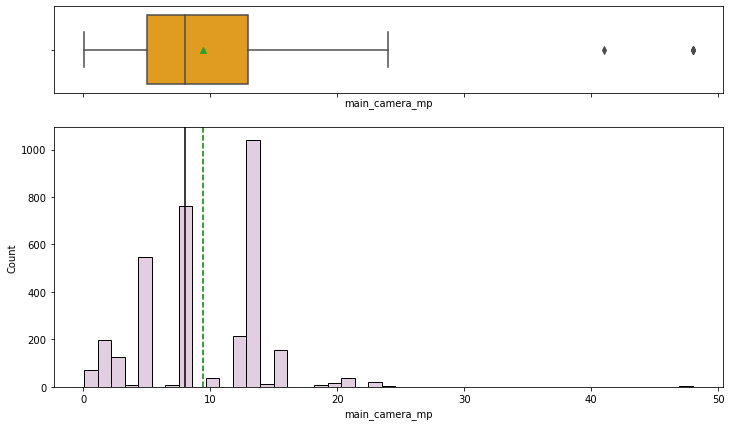

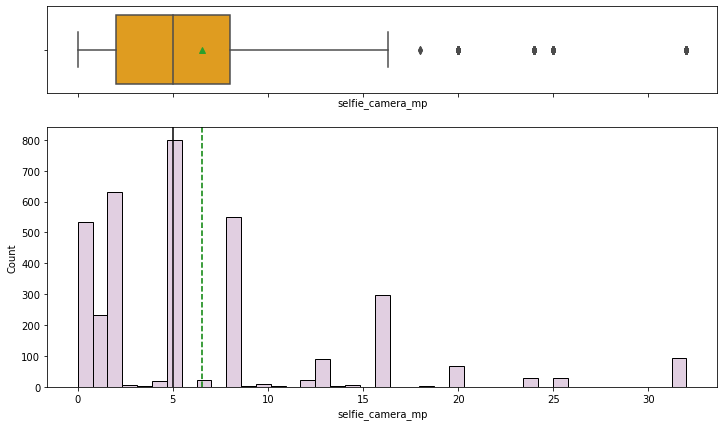

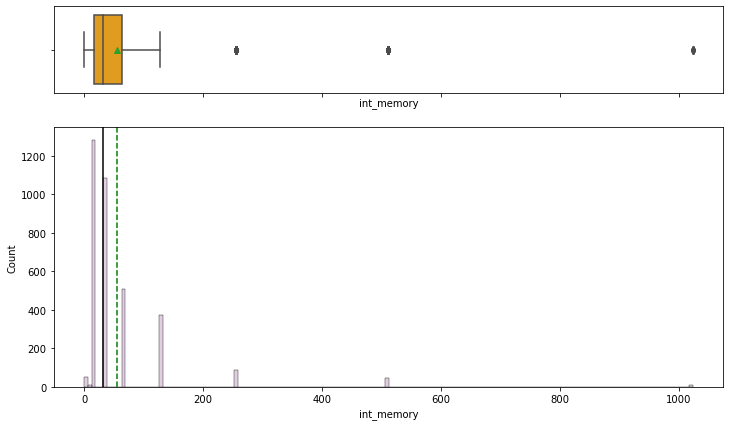

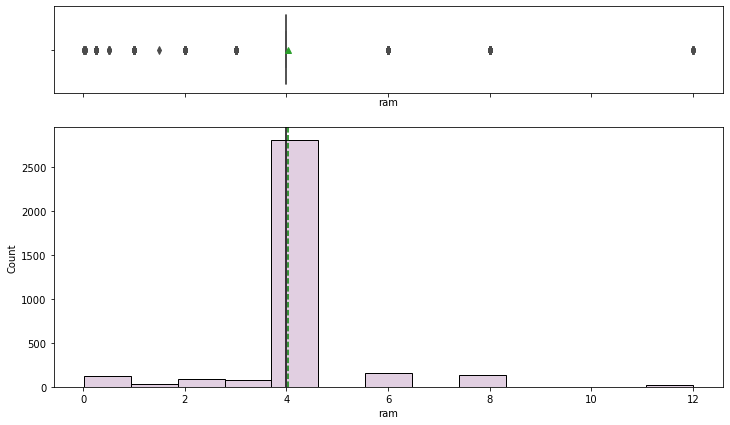

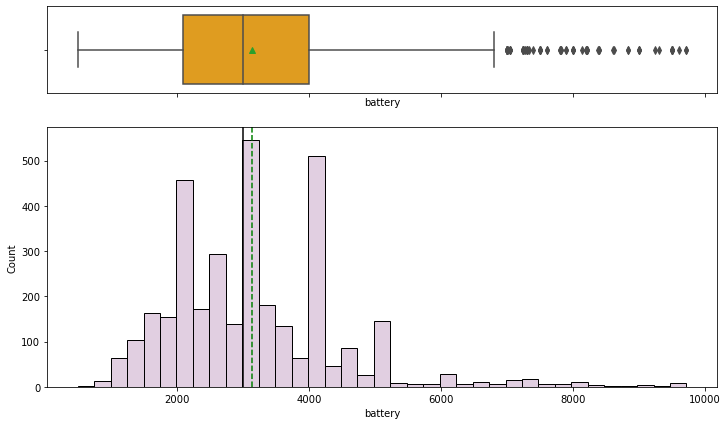

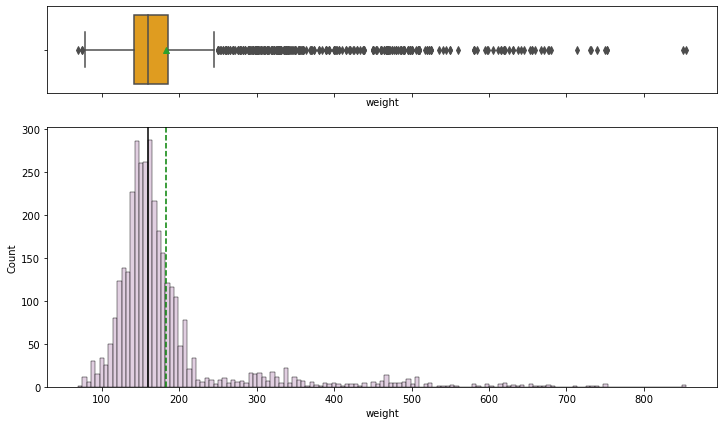

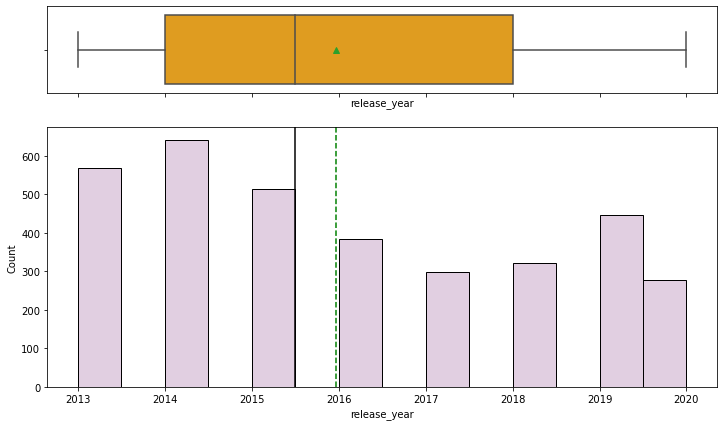

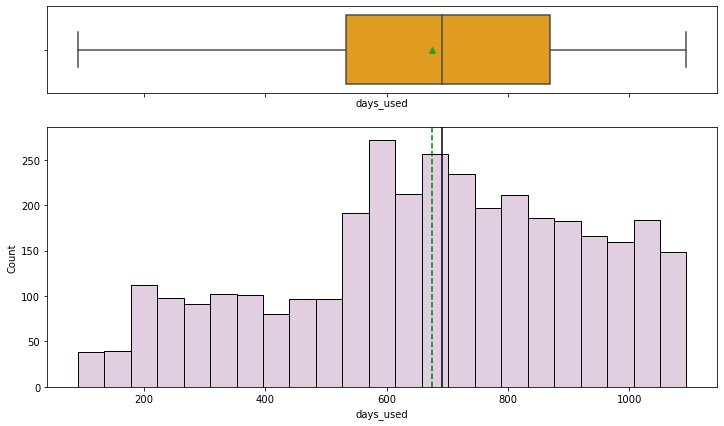

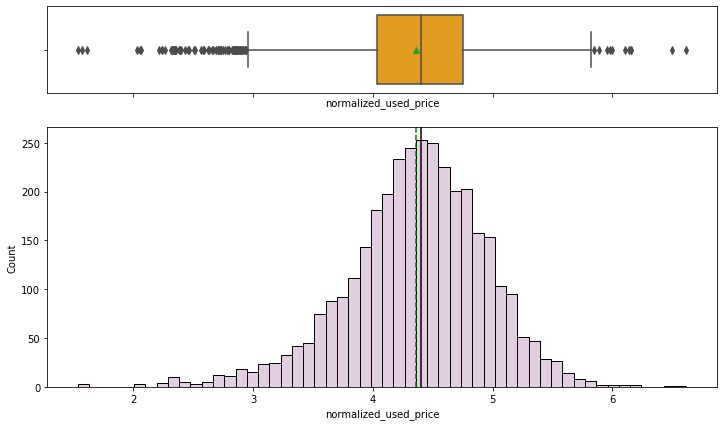

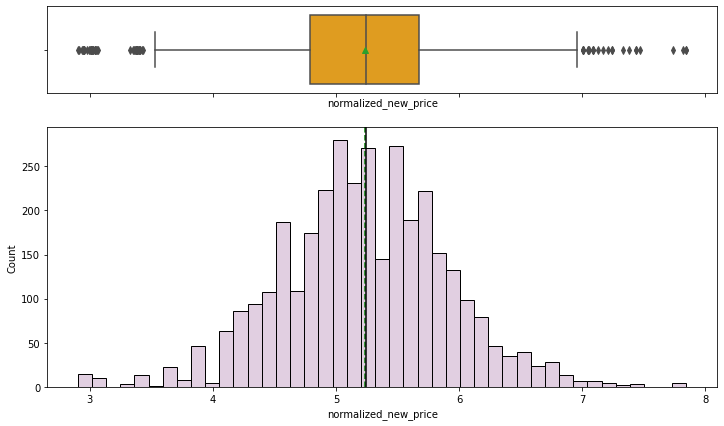

In [15]:
#plotting numerical data
cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']
for col in cols:
  histogram_boxplot(df, col)

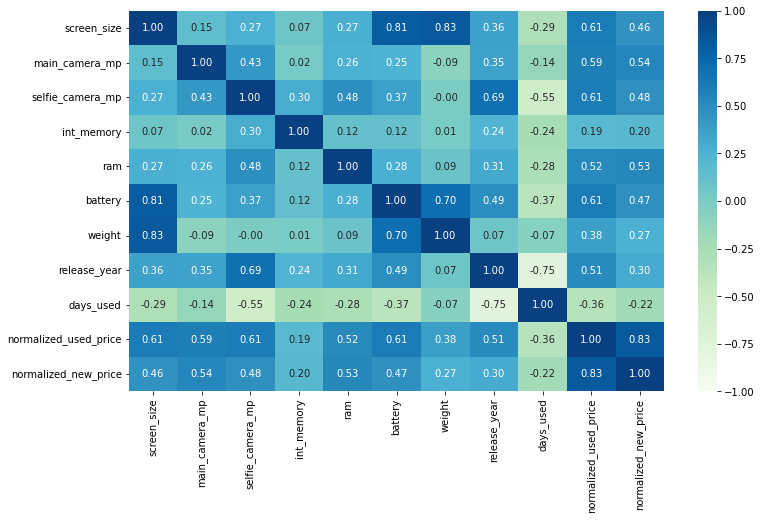

In [16]:
#plotting a correlation heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='GnBu')
plt.show()

1. What does the distribution of normalized used device prices look like?
- The distribution appears to follow a normal distribution pattern on the histogram.
- The boxplot shows outliers on both the lower and upper quartile ends.

2. What percentage of the used device market is dominated by Android devices?

In [17]:
android = round(3214/3454*100,1)
print(android, "percent of the used device market is dominated by Android devices.")

93.1 percent of the used device market is dominated by Android devices.


3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
- The amount of RAM averages around 4GB across all brands as this is the recommended amount for a technological device to function.
- Some brands not only have simple phones for devices but also larger and more powerful smartphones or tablets which require a larger RAM. Brands such as Huawei, Motorolla, OnePlus, Oppo, Samsung, and Xiaomi go up to 12GB RAM.
- Big brands that have been producing devices for years have a larger variance of RAM as they increase their specifications on new devices each year (e.g. Huawei, LG, Samsung, Apple)
- Brands that produce cheaper devices with less specifications have lower RAM values (e.g. Lava, Nokia, Alcatel, Micromax, ZTE, Gionee)

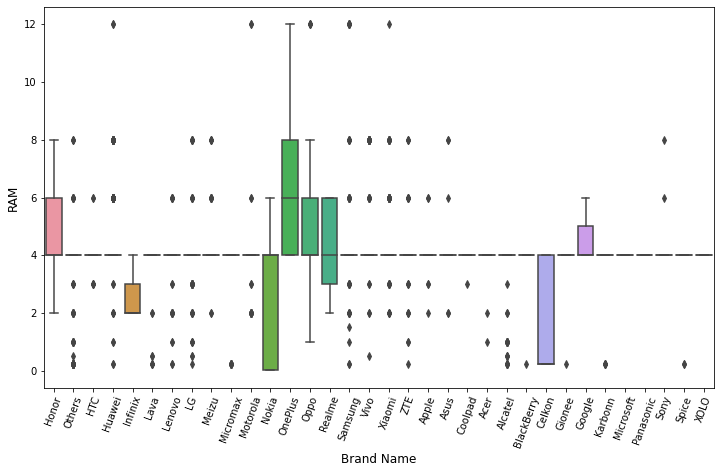

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=70)
plt.xlabel('Brand Name', fontsize=12)
plt.ylabel('RAM', fontsize=12)
plt.show()

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
- There is a positive correlation between weight and battery.
- The weight of devices tends to increase with larger batteries of more than 4500 mAh. The weight, however does vary a lot with larger batteries, ranging from 150 g to 850 g. 

In [19]:
df_battery = df[df.battery > 4500]
df_battery.shape

(341, 15)

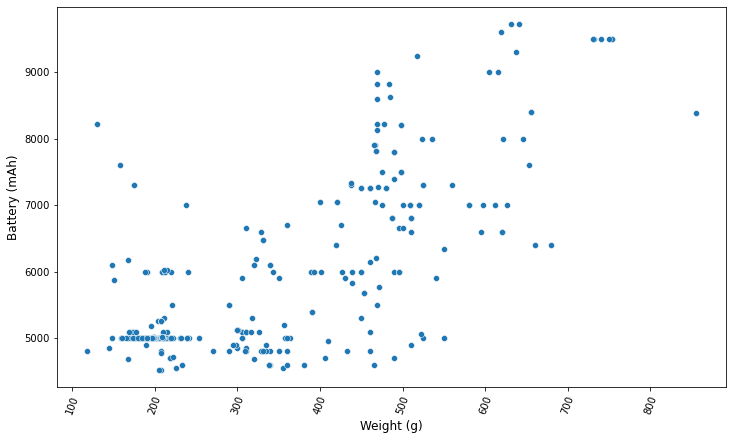

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_battery, x='weight', y='battery')
plt.xticks(rotation=70)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Battery (mAh)', fontsize=12)
plt.show()

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
- There are 1099 phones and tablets available across 31 different brands that have a screen size larger than 6 inches.
- The top two brands are Huawei and Samsung with 149 and 119 devices, respectively.

In [21]:
df_screen = df[df.screen_size > 6 * 2.54]
print(df_screen.shape, df_screen['brand_name'].nunique())

(1099, 15) 31


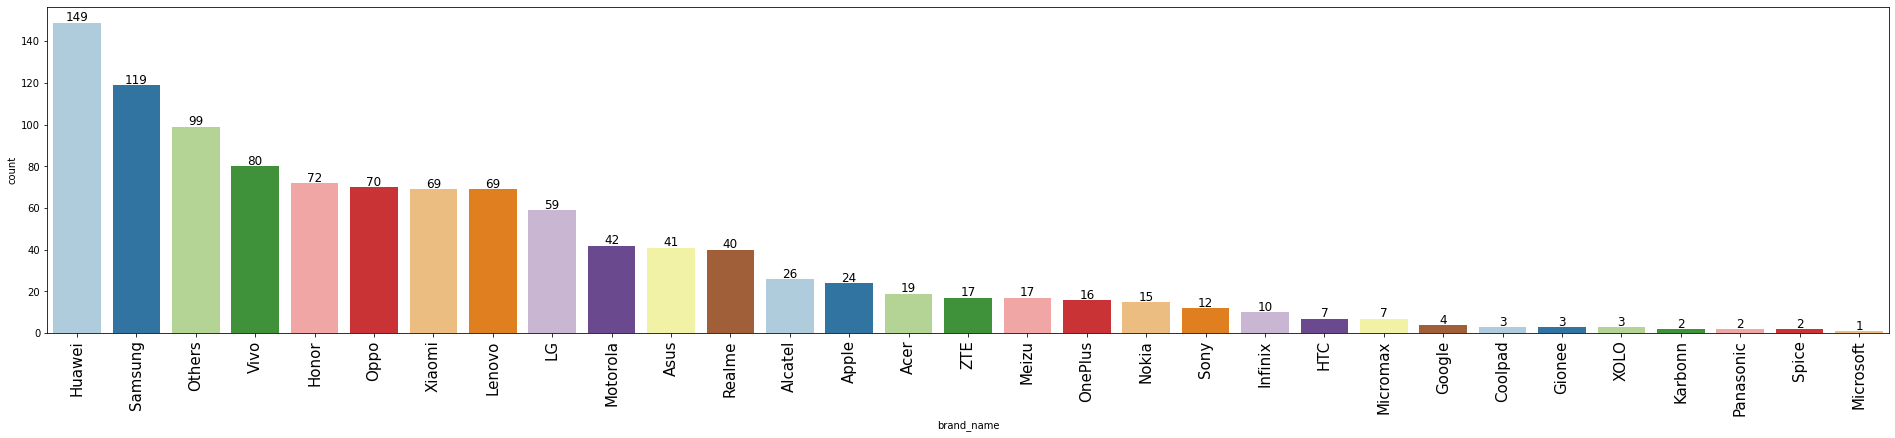

In [22]:
labeled_barplot(df_screen, 'brand_name')
plt.show()

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
- There are a total of 655 devices with 8MP and above in this dataset.
- The top five brands offering great selfie cameras are Huawei, Vivo, Oppo, Xiaomi, and Samsung. This is expected due to these brands being popular and hi-tech brands.
- The mid-range, cheaper, and less popular brands do not offer as many devices with selfie cameras over 8MP compared to the bigger brands.

In [23]:
df_selfie = df[df.selfie_camera_mp > 8]
df_selfie.shape

(655, 15)

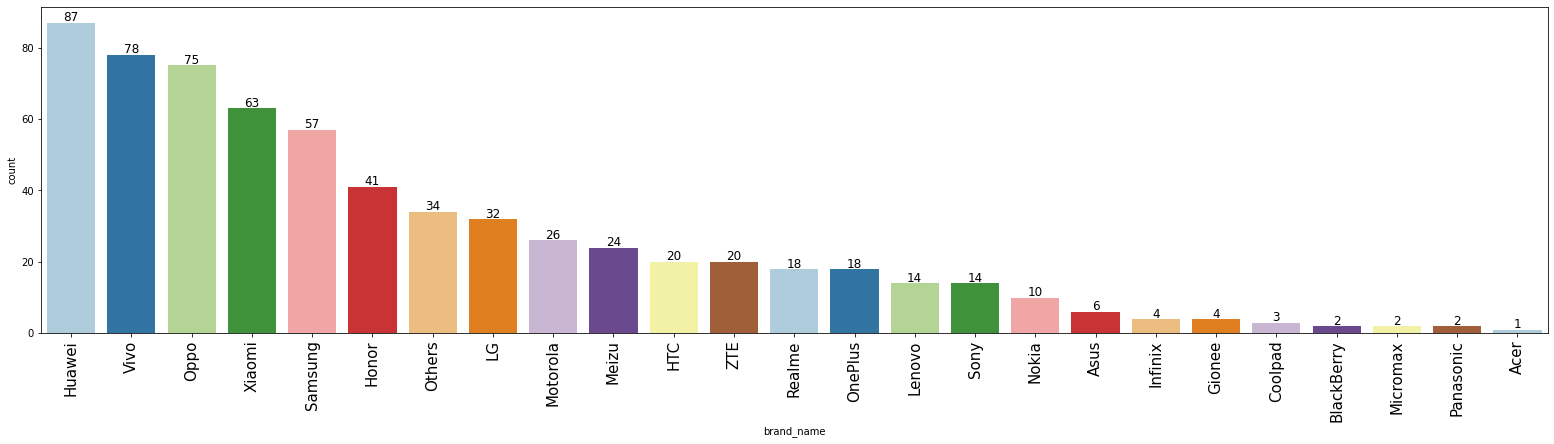

In [24]:
labeled_barplot(df_selfie, 'brand_name')
plt.show()

7. Which attributes are highly correlated with the normalized price of a used device?
- Only the normalised price of a new device is highly correlated with a used device, with a value of 0.83.
- Other attributes such as screen size, seflie camera mp, and battery have a strong correlation (0.61) with the normalised price of a used device.
- Main camera mp (0.59), RAM (0.52), and release year (0.51) have a weaker positive correlation.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [25]:
#treating missing values
df1 = df.copy()
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [26]:
#filling in columns with the median value
null_colls = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for col in null_colls:
  df1[col] = df1[col].fillna(value=df1.groupby(['release_year', 'brand_name'])[col].transform('median'))

print(df1.isnull().sum())

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [27]:
#filling in columns with the median value
null_colls = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'weight']
for col in null_colls:
  df1[col] = df1[col].fillna(value=df1.groupby(['brand_name'])[col].transform('median'))

print(df1.isnull().sum())

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


In [28]:
df1['main_camera_mp'].median()

8.0

In [29]:
#filling in columns with the median value
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(8.0)

print(df1.isnull().sum())

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


In [30]:
df1.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [31]:
#dropping release_year column and creating a numerical column containing number of years since release year
df1['years_from_release'] = 2022 - df1['release_year']
df1.drop(['release_year'], inplace = True, axis=1)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_from_release
0,Honor,Android,14.50,yes,no,13.00,5.00,64.00,3.00,3020.00,146.00,127,4.31,4.72,2
1,Honor,Android,17.30,yes,yes,13.00,16.00,128.00,8.00,4300.00,213.00,325,5.16,5.52,2
2,Honor,Android,16.69,yes,yes,13.00,8.00,128.00,8.00,4200.00,213.00,162,5.11,5.88,2
3,Honor,Android,25.50,yes,yes,13.00,8.00,64.00,6.00,7250.00,480.00,345,5.14,5.63,2
4,Honor,Android,15.32,yes,no,13.00,8.00,64.00,3.00,5000.00,185.00,293,4.39,4.95,2


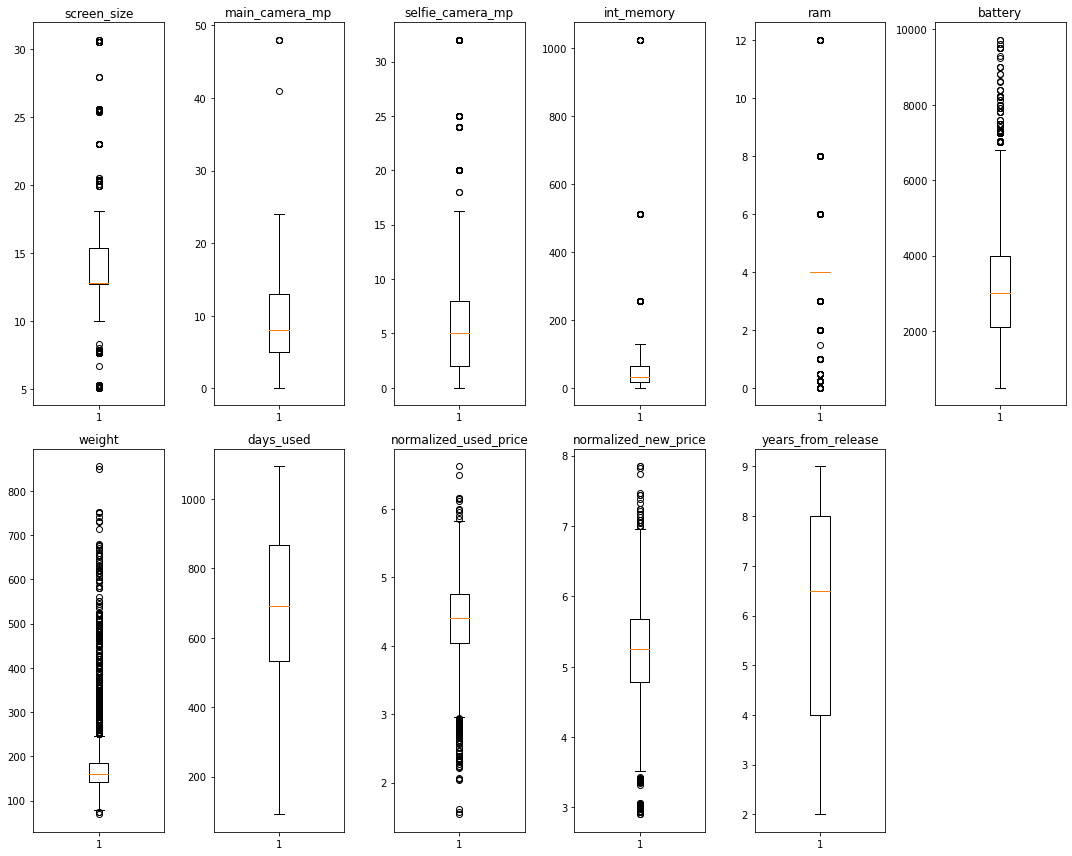

In [32]:
#checking outliers
num_cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price', 'years_from_release']
plt.figure(figsize=(15,12))
for i, variable in enumerate(num_cols):
  plt.subplot(2,6,i+1)
  plt.boxplot(df1[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [33]:
q1 = df1[num_cols].quantile(0.25)
q3 = df1[num_cols].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 - 1.5 * iqr
100 - ((df1[num_cols]<lw)|(df1[num_cols]>uw)).sum()/df1.shape[0]*100

screen_size             17.31
main_camera_mp           2.06
selfie_camera_mp         0.00
int_memory               0.00
ram                     81.50
battery                  1.27
weight                   8.54
days_used               14.79
normalized_used_price    9.15
normalized_new_price     6.83
years_from_release       8.02
dtype: float64

- Outliers will not be treated and will be kept in the dataset. The outliers account for the different device types such as mobile phones, smartphones, and tablets. Also different attributes and variation in prices are relevant to the dataset.

## EDA

- It is a good idea to explore the data once again after manipulating it.

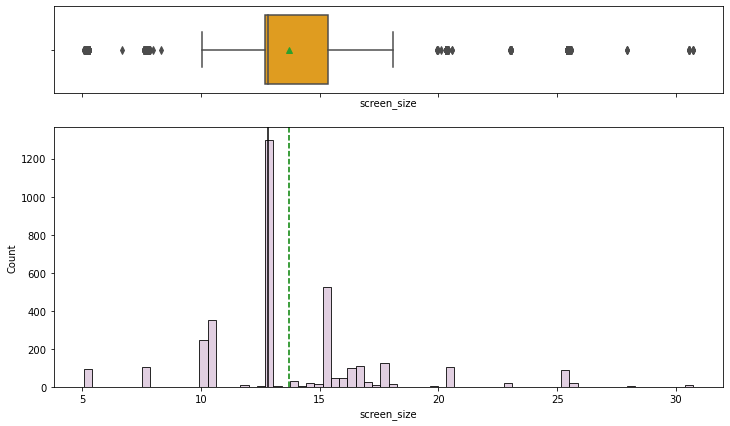

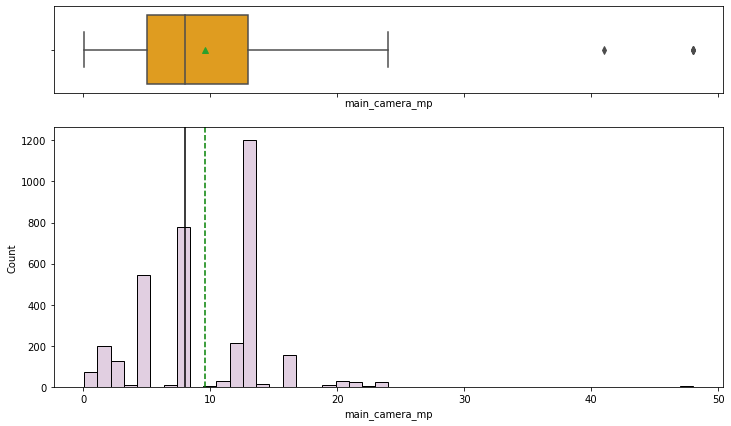

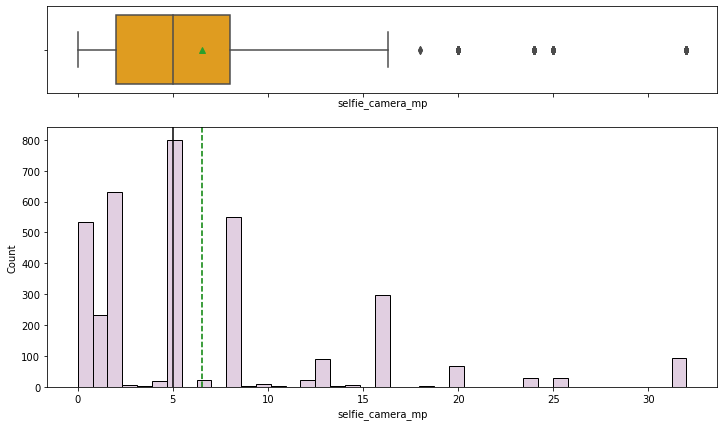

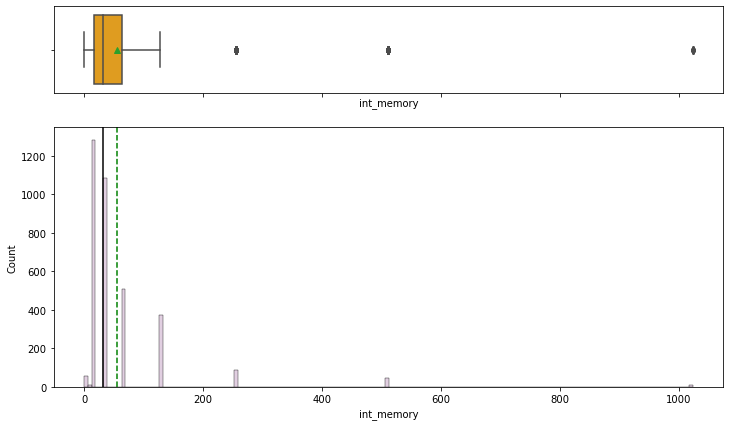

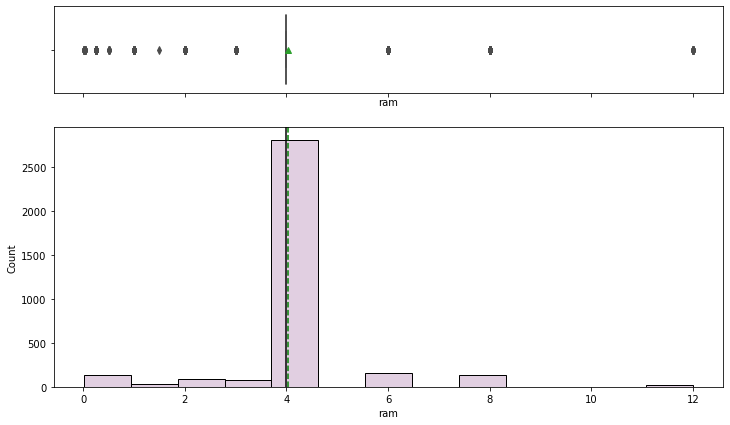

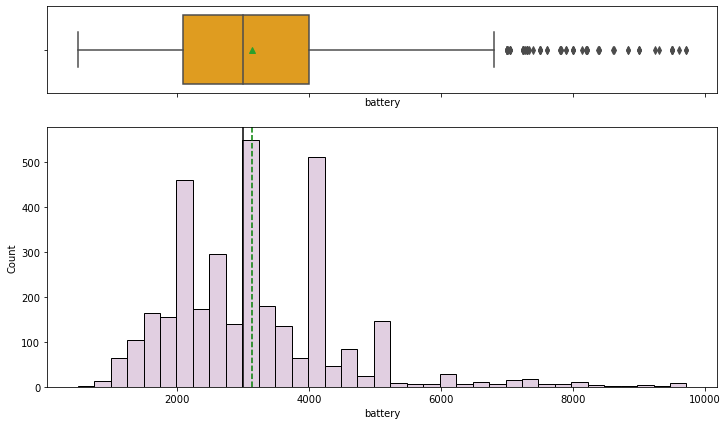

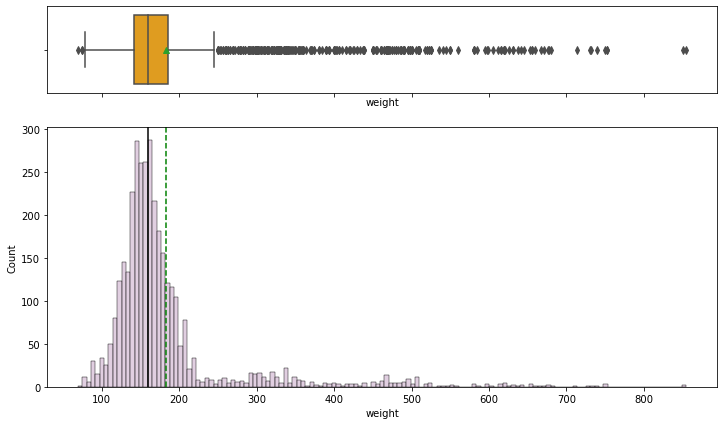

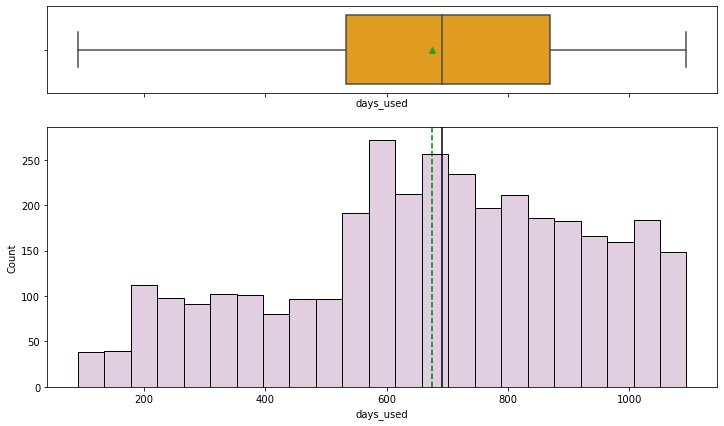

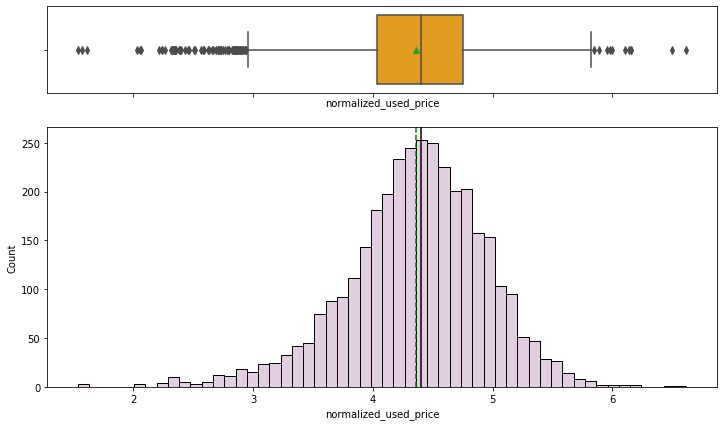

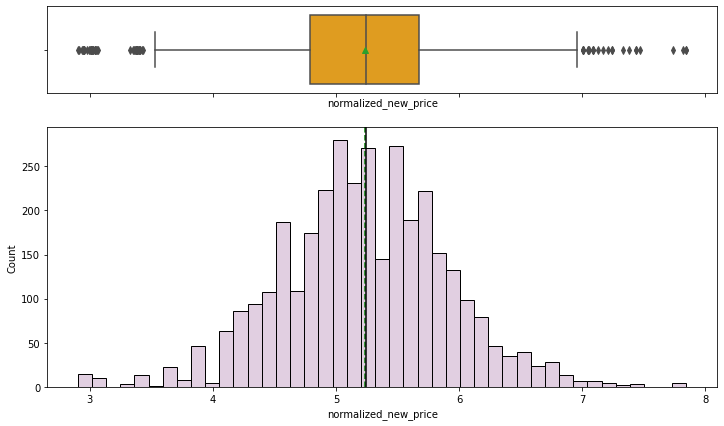

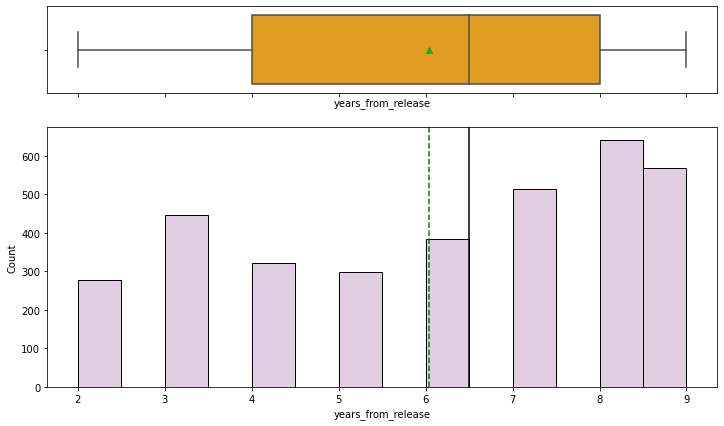

In [34]:
cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price', 'years_from_release']
for col in cols:
  histogram_boxplot(df1, col)

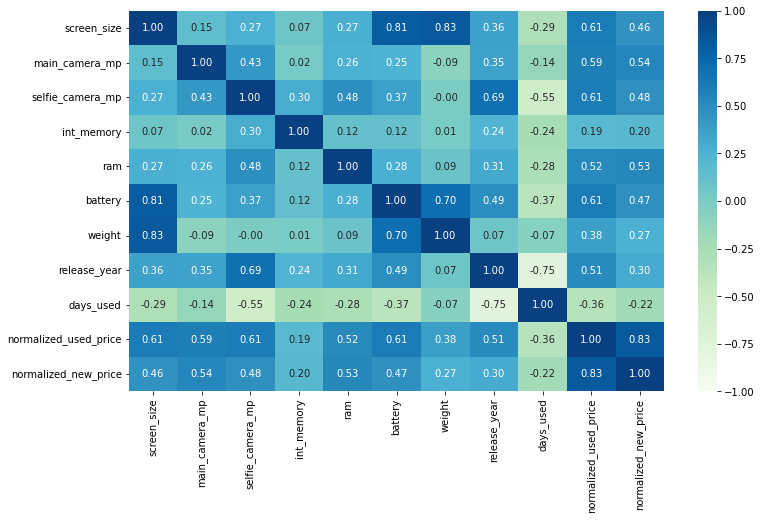

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='GnBu')
plt.show()

## Model Building - Linear Regression

In [36]:
#defining dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

In [37]:
#adding the constant (intercept)
X = sm.add_constant(X)

In [38]:
#creating dummy variables for non-numerical columns
X = pd.get_dummies(X, columns = X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first = True)

In [39]:
#splitting data into a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [40]:
print(X_train.head())
print(X_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026   1.00        10.29            8.00              0.30       16.00 4.00   
1525   1.00        15.34           13.00              5.00       32.00 4.00   
1128   1.00        12.70           13.00              5.00       32.00 4.00   
3003   1.00        12.83            8.00              5.00       16.00 4.00   
2907   1.00        12.88           13.00             16.00       16.00 4.00   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026  1800.00  120.00        819                  4.80  ...                 0   
1525  4050.00  225.00        585                  5.43  ...                 0   
1128  2550.00  162.00        727                  5.14  ...                 0   
3003  3200.00  126.00        800                  5.19  ...                 0   
2907  2900.00  160.00        560                  5.02  ...                 0   

      brand_name_Vivo  brand_name_XOLO

In [41]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                           18:32:56   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [42]:
#calculating adjusted R-squared
adj_r2_score = olsres.rsquared_adj

#function to calculate MAPE
def mape_score(dep_v, pred):
    return np.mean(np.abs(dep_v - pred) / dep_v) * 100

#function to display different metrics of the model performance
def model_performance_regression(model, ind_v, dep_v):
    pred = model.predict(ind_v) #predicting using independent variables
    r2 = model.rsquared #getting R-squared
    adjr2 = adj_r2_score #getting adj. R-squared
    rmse = np.sqrt(mean_squared_error(dep_v, pred)) #calculating RMSE
    mae = mean_absolute_error(dep_v, pred) #calculating MAE
    mape = mape_score(dep_v, pred) #calculating MAPE
    #creating dataframe for metrics
    df_performance = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_performance

In [43]:
print("TRAINING SET PERFORMANCE:\n")
olsmod_train_perf = model_performance_regression(olsres, X_train, y_train)
olsmod_train_perf

TRAINING SET PERFORMANCE:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23,0.18,0.84,0.84,4.33


In [44]:
print("TESTING SET PERFORMANCE:\n")
olsmod_test_perf = model_performance_regression(olsres, X_test, y_test)
olsmod_test_perf

TESTING SET PERFORMANCE:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24,0.18,0.84,0.84,4.50


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**1. Multicollinearity check**

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#function for calculating the VIF for each variable
def checking_vif(ind_v):
    vif = pd.DataFrame()
    vif["feature"] = ind_v.columns
    vif["VIF"] = [variance_inflation_factor(ind_v.values, i) for i in range(len(ind_v.columns))]
    return vif

In [46]:
checking_vif(X_train) 

,feature,VIF
0,const,233.24
1,screen_size,7.68
2,main_camera_mp,2.29
3,selfie_camera_mp,2.81
4,int_memory,1.36
5,ram,2.28
6,battery,4.08
7,weight,6.40
8,days_used,2.66
9,normalized_new_price,3.12


In [47]:
def treating_multicollinearity(ind_v, dep_v, high_vif_col):
    #creating empty lists for adj. R2 and RMSE
    adj_r2 = []
    rmse = []
    #function to drop high VIF columns one at a time, create model, and append adj. R2/RMSE to list
    for cols in high_vif_col:
        train = ind_v.loc[:, ~ind_v.columns.str.startswith(cols)]
        olsmodel = sm.OLS(dep_v, train).fit()
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))
    #creating dataframe for output
    temp = pd.DataFrame(
        {
            "col": high_vif_col,
            "Adj. R-squared after dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [48]:
high_vif_col_list = ['screen_size', 'weight']

res = treating_multicollinearity(X_train, y_train, high_vif_col_list)
res

,col,Adj. R-squared after dropping col,RMSE after dropping col
0,screen_size,0.84,0.23
1,weight,0.84,0.23


In [49]:
col_to_drop = 'screen_size'
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

#re-checking VIF
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,206.34
1,main_camera_mp,2.28
2,selfie_camera_mp,2.81
3,int_memory,1.36
4,ram,2.28
5,battery,3.84
6,weight,2.99
7,days_used,2.65
8,normalized_new_price,3.08
9,years_from_release,4.73


In [50]:
olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [51]:
dep_v = X_train2.copy()
cols = dep_v.columns.tolist()

max_p_value = 1 #setting max p-value

#while loop for dropping p-values > 0.05 
while len(cols) > 0:
    x_train_aux = dep_v[cols]
    model = sm.OLS(y_train, x_train_aux).fit()
    p_values = model.pvalues
    max_p_value = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_from_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [52]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [53]:
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [54]:
adj_r2_score = olsmod2.rsquared_adj

#function for calculating MAPE
def mape_score(dep_v, pred):
    return np.mean(np.abs(dep_v - pred) / dep_v) * 100

#function to display different metrics of the model performance
def model_performance_regression(model, ind_v, dep_v):
    pred = model.predict(ind_v) #predicting using independent variables
    r2 = model.rsquared #getting R-squared
    adjr2 = adj_r2_score #getting adj. R-squared
    rmse = np.sqrt(mean_squared_error(dep_v, pred)) #calculating RMSE
    mae = mean_absolute_error(dep_v, pred) #calculating MAE
    mape = mape_score(dep_v, pred) #calculating MAPE
    #creating dataframe for metrics
    df_performance = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_performance

In [55]:
print("TRAINING SET PERFORMANCE:\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train3, y_train)
olsmod2_train_perf

TRAINING SET PERFORMANCE:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23,0.18,0.84,0.84,4.40


In [56]:
print("TESTING SET PERFORMANCE:\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test3, y_test)
olsmod2_test_perf

TESTING SET PERFORMANCE:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24,0.19,0.84,0.84,4.56


- Multicollinearity has been addressed with X_train3 as the final predictor set and olsmod2 as the final model.
- All variables with p-value > 0.05 have been removed.
- The adjusted R-squared is now 0.838 meaning the model can explain ~84% of the variance. The first model had an adjusted R-squared of 0.842 before performing multicollinearity checks.
- Overall after the variables were dropped, it did not affect the model's RMSE and MAE values significantly. This indicates that the model is not overfitting or underfitting.

**2. Linearity and independence check**

In [57]:
#creating dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmod2.fittedvalues
df_pred["Residuals"] = olsmod2.resid
df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.09,3.87,0.22
1525,4.45,4.60,-0.15
1128,4.32,4.29,0.03
3003,4.28,4.20,0.09
2907,4.46,4.49,-0.03


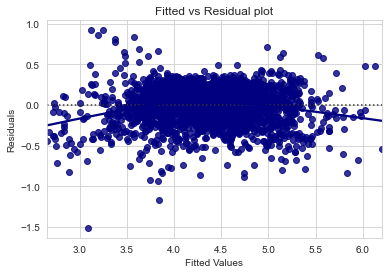

In [58]:
#plotting the fitted values vs residuals values
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="navy", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- No pattern is observed in the plots above. The assumptions of linearity and independence are satisfied.

**3. Normality check**

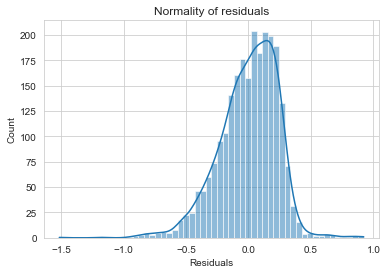

In [59]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

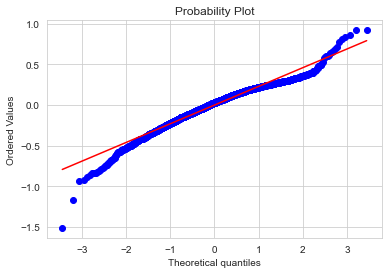

In [60]:
import pylab
import scipy.stats as stats

#Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [61]:
stats.shapiro(df_pred["Residuals"]) #Shaprio-Wilk's test

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

- The histogram appears to show a normal distribution.
- The Q-Q plot of residuals follows the straight red line reasonably close.
- For the Shapiro-Wilk test, the p-value is < 0.05, meaning the residuals are not normal.
- However, the other two plots appear to follow normal distribution so as an approximation, I have accepted this distribution as close to being normal and so the assumption for normality is satisfied.

**4. Homoscedasticity check**

In [62]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#Goldfeldquandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], X_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

- As the p-value is > 0.05, I can say that the residuals are homoscedastic, so this assumption is satisfied.

## Final Model

In [63]:
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

In [64]:
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                           18:33:02   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [65]:
adj_r2_score = olsmodel_final.rsquared_adj

def mape_score(dep_v, pred):
    return np.mean(np.abs(dep_v - pred) / dep_v) * 100

def model_performance_regression(model, ind_v, dep_v):
    pred = model.predict(ind_v)
    r2 = model.rsquared
    adjr2 = adj_r2_score
    rmse = np.sqrt(mean_squared_error(dep_v, pred))
    mae = mean_absolute_error(dep_v, pred)
    mape = mape_score(dep_v, pred)
    df_performance = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_performance

In [66]:
print("TRAINING SET PERFORMANCE:\n")
olsmod_train_final = model_performance_regression(olsmodel_final, X_train_final, y_train)
olsmod_train_final

TRAINING SET PERFORMANCE:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23,0.18,0.84,0.84,4.40


In [67]:
print("TESTING SET PERFORMANCE:\n")
olsmod_test_final = model_performance_regression(olsmodel_final, X_test_final, y_test)
olsmod_test_final

TESTING SET PERFORMANCE:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24,0.19,0.84,0.84,4.56


## Actionable Insights and Recommendations 

- The model can explain ~84% of variation in the data.
- The train and test set RMSE and MAE are low and equal, meaning the model is not overfitted or underfitted.
- The MAPE on the test set suggests we can predict within 4.4% of the normalised price of used devices.
- I can conclude this model is a good fit to use for predicitions and inferences.
- If the main camera MP, selfie camera MP, RAM, and weight increases by one unit, the normalised used price increases by 0.0210, 0.0138, 0.0207, and 0.0017 units, respectively.
- If the years from release increases by one unit, the normalised used price decreases by 0.0292 units.
- The used price increases with 4G devices compared to a decrease in used prices for 5G devices.
- Karbonn and Xiaomi devices increase used price units compared to other brands.

EDA Analysis:
- 93.1% of the used device market is dominated by Android devices.
- The top two brands are Huawei and Samsung.

ReCell can focus on refurbishing devices that have 4G, higher RAM, and higher main/selfie camera MP as this increases the used price for devices. Brands such as Karbonn and Xiaomi seem to increase the used price. ReCell need to look at only stocking newer and popular phones, and ones that increase used price units (i.e Huawei, Samsung, Karbonn, Xiaomi) as the older the phone is (since the release year), the less they are worth new and used.

___